In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

# Plotting and Visualization

There are a handful of third-party Python packages that are suitable for creating scientific plots and visualizations. These include packages like:

* matplotlib
* Chaco
* PyX
* Bokeh

Here, we will focus excelusively on matplotlib and the high-level plotting availabel within pandas. It is currently the most robust and feature-rich package available.

### Visual representation of data

We require plots, charts and other statistical graphics for the written communication of quantitative ideas.

They allow us to more easily convey relationships and reveal deviations from patterns.

Gelman and Unwin 2011:

> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

## Matplotlib

The easiest way to interact with matplotlib is via `pylab` in iPython. By starting iPython (or iPython notebook) in "pylab mode", both matplotlib and numpy are pre-loaded into the iPython session:

    ipython notebook --pylab
    
You can specify a custom graphical backend (*e.g.* qt, gtk, osx), but iPython generally does a good job of auto-selecting. Now matplotlib is ready to go, and you can access the matplotlib API via `plt`. If you do not start iPython in pylab mode, you can do this manually with the following convention:

    import matplotlib.pyplot as plt

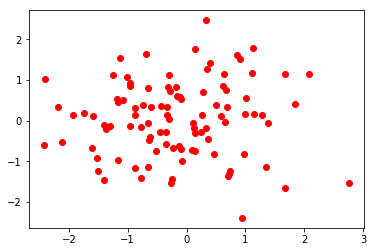

In [2]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

The above plot simply shows two sets of random numbers taken from a normal distribution plotted against one another. The `'ro'` argument is a shorthand argument telling matplotlib that I wanted the points represented as red circles.

This plot was expedient. We can exercise a little more control by breaking the plotting into a workflow:

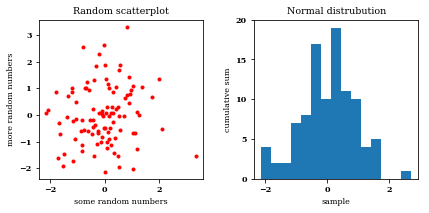

In [3]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

matplotlib is a relatively low-level plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

If you want to make your plots look pretty like mine, steal the *matplotlibrc* file from [Huy Nguyen](http://www.huyng.com/posts/sane-color-scheme-for-matplotlib/).

## Plotting in Pandas

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

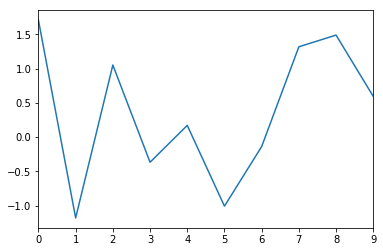

In [4]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

Notice that by default a line plot is drawn, and a light grid is included. All of this can be changed, however:

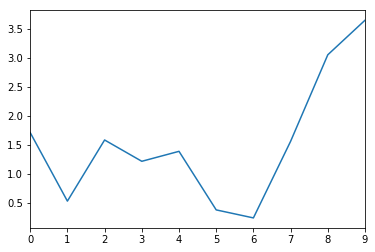

In [5]:
normals.cumsum().plot(grid=False)

Similarly, for a DataFrame:

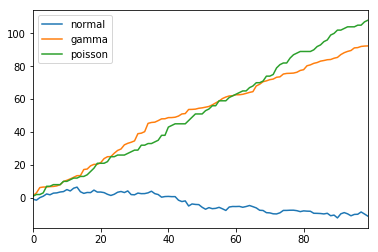

In [6]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                       'gamma': np.random.gamma(1, size=100), 
                       'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000BC499C4208>,
      dtype=object)

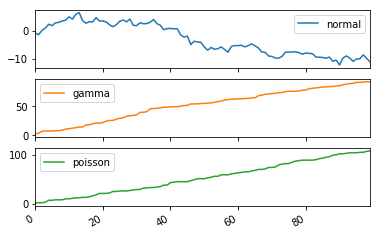

In [7]:
variables.cumsum(0).plot(subplots=True)

Or, we may want to have some series displayed on the secondary y-axis, which can allow for greater detail and less empty space:

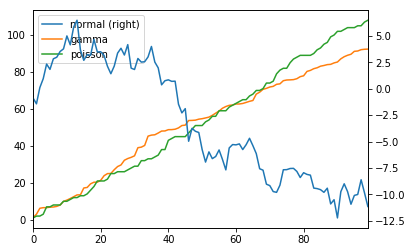

In [8]:
variables.cumsum(0).plot(secondary_y='normal')

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

Text(0, 0.5, 'cumulative sum')

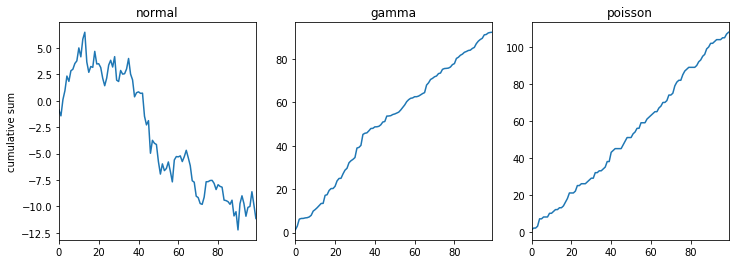

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

## Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [10]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000      0      0   24160  211.3375       B5        S    2    NaN   
1   0.9167      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

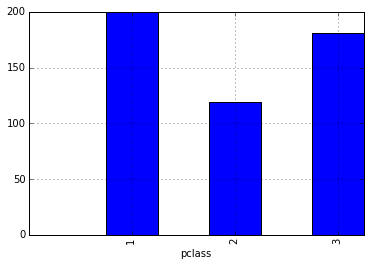

In [11]:
titanic.groupby('pclass').survived.sum().plot(kind='bar')

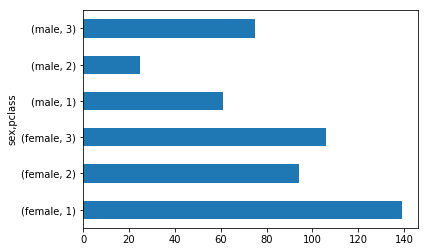

In [11]:
titanic.groupby(['sex','pclass']).survived.sum().plot(kind='barh')

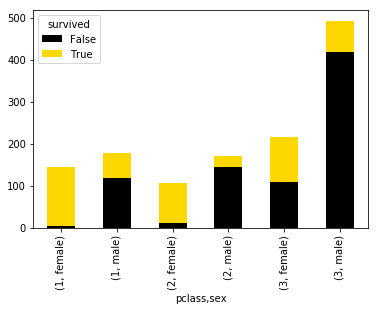

In [12]:
death_counts = pd.crosstab([titanic.pclass, titanic.sex], titanic.survived.astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Another way of comparing the groups is to look at the survival *rate*, by adjusting for the number of people in each group.

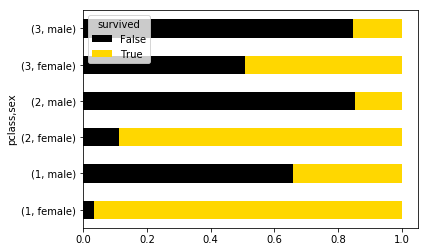

In [13]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequenfly it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For example, we might want to see how the fares were distributed aboard the titanic:

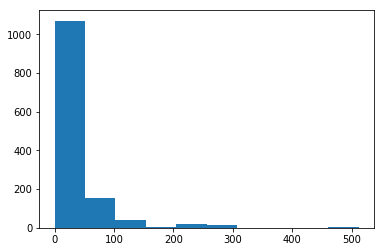

In [14]:
titanic.fare.hist(grid=False)

The `hist` method puts the continuous fare values into **bins**, trying to make a sensible décision about how many bins to use (or equivalently, how wide the bins are). We can override the default value (10):

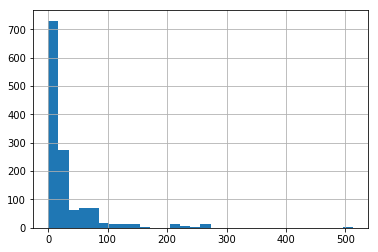

In [15]:
titanic.fare.hist(bins=30)

There are algorithms for determining an "optimal" number of bins, each of which varies somehow with the number of observations in the data series.

In [16]:
sturges = lambda n: int(np.log2(n) + 1)
square_root = lambda n: int(np.sqrt(n))
from scipy.stats import kurtosis
doanes = lambda data: int(1 + np.log(len(data)) + np.log(1 + kurtosis(data) * (len(data) / 6.) ** 0.5))

n = len(titanic)
sturges(n), square_root(n), doanes(titanic.fare.dropna())

(11, 36, 14)

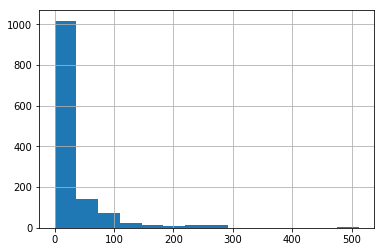

In [17]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()))

A **density plot** is similar to a histogram in that it describes the distribution of the underlying data, but rather than being a pure empirical representation, it is an *estimate* of the underlying "true" distribution. As a result, it is smoothed into a continuous line plot. We create them in Pandas using the `plot` method with `kind='kde'`, where `kde` stands for **kernel density estimate**.

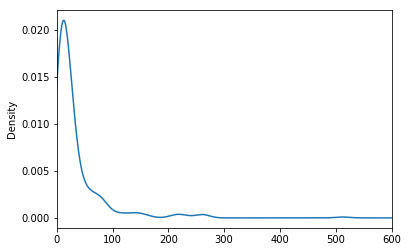

In [18]:
titanic.fare.dropna().plot(kind='kde', xlim=(0,600))

Often, histograms and density plots are shown together:

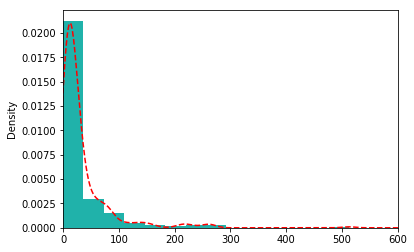

In [20]:
titanic.fare.hist(bins=doanes(titanic.fare.dropna()), density=True, color='lightseagreen')
titanic.fare.dropna().plot(kind='kde', xlim=(0,600), style='r--')

Here, we had to normalize the histogram (`normed=True`), since the kernel density is normalized by definition (it is a probability distribution).

We will explore kernel density estimates more in the next section.

## Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

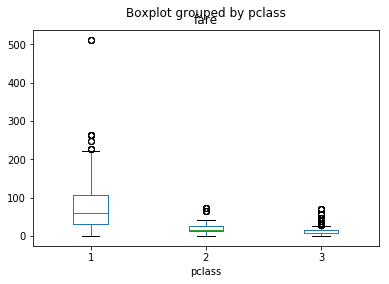

In [21]:
titanic.boxplot(column='fare', by='pclass', grid=False)

You can think of the box plot as viewing the distribution from above. The blue crosses are "outlier" points that occur outside the extreme quantiles.

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

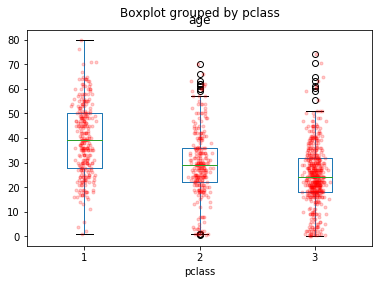

In [22]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.2)

When data are dense, a couple of tricks used above help the visualization:

1. reducing the alpha level to make the points partially transparent
2. adding random "jitter" along the x-axis to avoid overstriking

A related but inferior cousin of the box plot is the so-called dynamite plot, which is just a bar chart with half of an error bar.

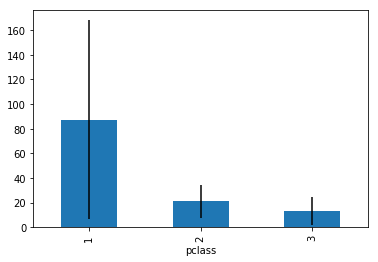

In [23]:
titanic.groupby('pclass')['fare'].mean().plot(kind='bar', yerr=titanic.groupby('pclass')['fare'].std())

Why is this plot a poor choice?

- bar charts should be used for measurable quantities (*e.g.* raw data), not estimates. The area of the bar does not represent anything, since these are estimates derived from the data.
- the "data-ink ratio" (*sensu* Edward Tufte) is very high. There are only 6 values represented here (3 means and 3 standard deviations).
- the plot hides the underlying data.

A boxplot is **always** a better choice than a dynamite plot.

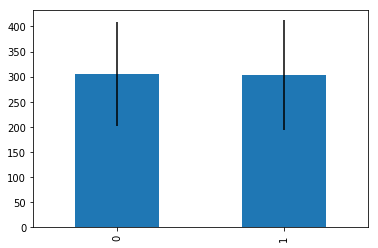

In [24]:
data1 = [150, 155, 175, 200, 245, 255, 395, 300, 305, 320, 375, 400, 420, 430, 440]
data2 = [225, 380]

fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)

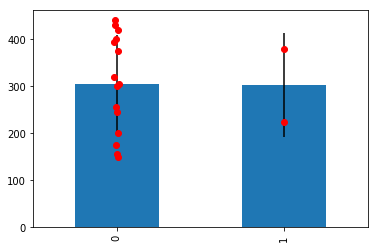

In [25]:
fake_data = pd.DataFrame([data1, data2]).transpose()
p = fake_data.mean().plot(kind='bar', yerr=fake_data.std(), grid=False)
x1, x2 = p.xaxis.get_majorticklocs()
plt.plot(np.random.normal(x1, 0.01, size=len(data1)), data1, 'ro')
plt.plot([x2]*len(data2), data2, 'ro')

### Exercise

Using the Titanic data, create kernel density estimate plots of the age distributions of survivors and victims.

## Scatterplots

To look at how Pandas does scatterplots, let's reload the baseball sample dataset.

In [26]:
baseball = pd.read_csv("data/baseball.csv")
baseball.head()

      id     player  year  stint team  lg   g  ab  r   h  ...  rbi   sb   cs  \
0  88641  womacto01  2006      2  CHN  NL  19  50  6  14  ...  2.0  1.0  1.0   
1  88643  schilcu01  2006      1  BOS  AL  31   2  0   1  ...  0.0  0.0  0.0   
2  88645  myersmi01  2006      1  NYA  AL  62   0  0   0  ...  0.0  0.0  0.0   
3  88649  helliri01  2006      1  MIL  NL  20   3  0   0  ...  0.0  0.0  0.0   
4  88650  johnsra05  2006      1  NYA  AL  33   6  0   1  ...  0.0  0.0  0.0   

   bb   so  ibb  hbp   sh   sf  gidp  
0   4  4.0  0.0  0.0  3.0  0.0   0.0  
1   0  1.0  0.0  0.0  0.0  0.0   0.0  
2   0  0.0  0.0  0.0  0.0  0.0   0.0  
3   0  2.0  0.0  0.0  0.0  0.0   0.0  
4   0  4.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 23 columns]

Scatterplots are useful for data exploration, where we seek to uncover relationships among variables. There are no scatterplot methods for Series or DataFrame objects; we must instead use the matplotlib function `scatter`.

(0, 200)

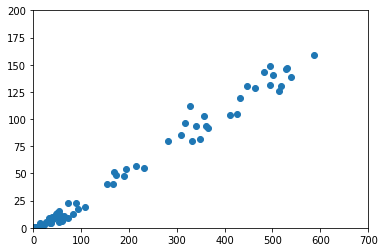

In [27]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0, 700); plt.ylim(0, 200)

We can add additional information to scatterplots by assigning variables to either the size of the symbols or their colors.

(0, 200)

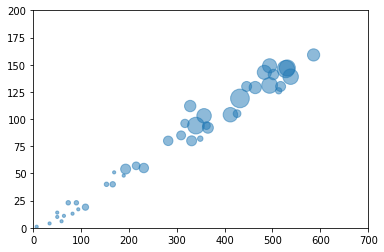

In [28]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)
plt.xlim(0, 700); plt.ylim(0, 200)

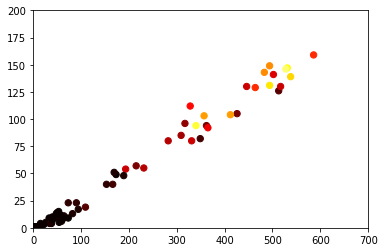

In [32]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')
plt.xlim(0, 700); plt.ylim(0, 200);

To view scatterplots of a large numbers of variables simultaneously, we can use the `scatter_matrix` function that was recently added to Pandas. It generates a matrix of pair-wise scatterplots, optiorally with histograms or kernel density estimates on the diagonal.

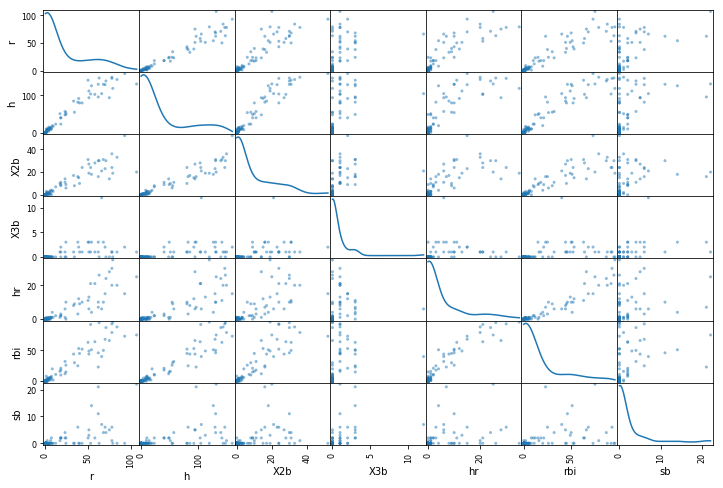

In [33]:
_ = pd.plotting.scatter_matrix(baseball.loc[:,'r':'sb'], figsize=(12,8), diagonal='kde')

## Trellis Plots

One of the enduring strengths of carrying out statistical analyses in the R language is the quality of its graphics. In particular, the addition of [Hadley Wickham's ggplot2 package](http://ggplot2.org) allows for flexible yet user-friendly generation of publication-quality plots. Its srength is based on its implementation of a powerful model of graphics, called the [Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.pdf) (GofG). The GofG is essentially a theory of scientific graphics that allows the components of a graphic to be completely described. ggplot2 uses this description to build the graphic component-wise, by adding various layers.

Pandas recently added functions for generating graphics using a GofG approach. Chiefly, this allows for the easy creation of **trellis plots**, which are a faceted graphic that shows relationships between two variables, conditioned on particular values of other variables. This allows for the representation of more than two dimensions of information without having to resort to 3-D graphics, etc.


Let's use the `titanic` dataset to create a trellis plot that represents 4 variables at a time. This consists of 4 steps:

1. Create a `RPlot` object that merely relates two variables in the dataset
2. Add a grid that will be used to condition the variables by both passenger class and sex
3. Add the actual plot that will be used to visualize each comparison
4. Draw the visualization

In [35]:
# rplot is now deprecated. Do not run this code snippet
from pandas.tools.rplot import *

titanic = titanic[titanic.age.notnull() & titanic.fare.notnull()]

tp = RPlot(titanic, x='age')
tp.add(TrellisGrid(['pclass', 'sex']))
tp.add(GeomDensity())
_ = tp.render(plt.gcf())

ModuleNotFoundError: No module named 'pandas.plotting.rplot'

Using the cervical dystonia dataset, we can simultaneously examine the relationship between age and the primary outcome variable as a function of both the treatment received and the week of the treatment by creating a scatterplot of the data, and fitting a polynomial relationship between `age` and `twstrs`:

In [36]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39

In [37]:
# rplot is deprecated. Do not run this code snippet.
plt.figure(figsize=(12,12))
bbp = RPlot(cdystonia, x='age', y='twstrs')
bbp.add(TrellisGrid(['week', 'treat']))
bbp.add(GeomScatter())
bbp.add(GeomPolyFit(degree=2))
_ = bbp.render(plt.gcf())

NameError: name 'RPlot' is not defined

<Figure size 864x864 with 0 Axes>

We can use the `RPlot` class to represent more than just trellis graphics. It is also useful for displaying multiple variables on the same panel, using combinations of color, size and shapes to do so.

In [39]:
cdystonia['site'] = cdystonia.site.astype(float)

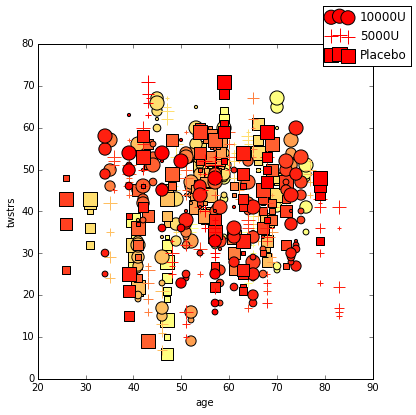

In [41]:
# rplot is deprecated. Do not run this code snippet.
plt.figure(figsize=(6,6))
cp = RPlot(cdystonia, x='age', y='twstrs')
cp.add(GeomPoint(colour=ScaleGradient('site', colour1=(1.0, 1.0, 0.5), colour2=(1.0, 0.0, 0.0)),
            size=ScaleSize('week', min_size=10.0, max_size=200.0),
            shape=ScaleShape('treat')))
_ = cp.render(plt.gcf())